In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load the data

In [2]:
samples = pd.read_csv("dataset_mood_smartphone.csv", 
                      sep=',', 
                      index_col=0, 
                      parse_dates=[2], 
                      dtype={"id": "category", "variable": "category"}, 
                      verbose=True)
samples

Tokenization took: 54.81 ms
Type conversion took: 47.31 ms
Parser memory cleanup took: 0.02 ms
Tokenization took: 38.56 ms
Type conversion took: 56.14 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 33.26 ms
Type conversion took: 51.51 ms
Parser memory cleanup took: 0.01 ms


,id,time,variable,value
1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...
2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


## Column types

In [3]:
samples.dtypes

id                category
time        datetime64[ns]
variable          category
value              float64
dtype: object

In [4]:
samples.dtypes.value_counts()

category          1
datetime64[ns]    1
category          1
float64           1
dtype: int64

## Observations per subject

<AxesSubplot: >

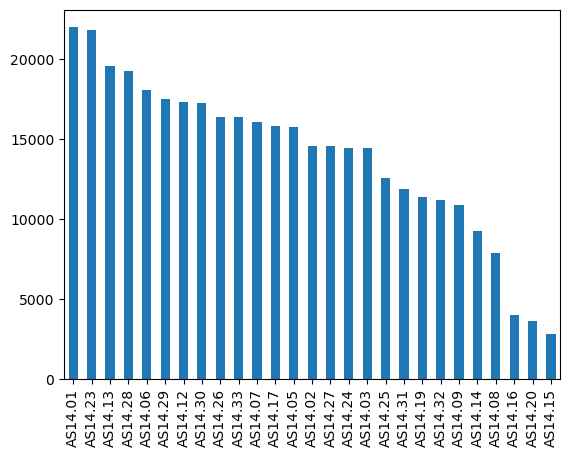

In [12]:
samples["id"].value_counts().plot(kind="bar")

## Observations per variables

<AxesSubplot: >

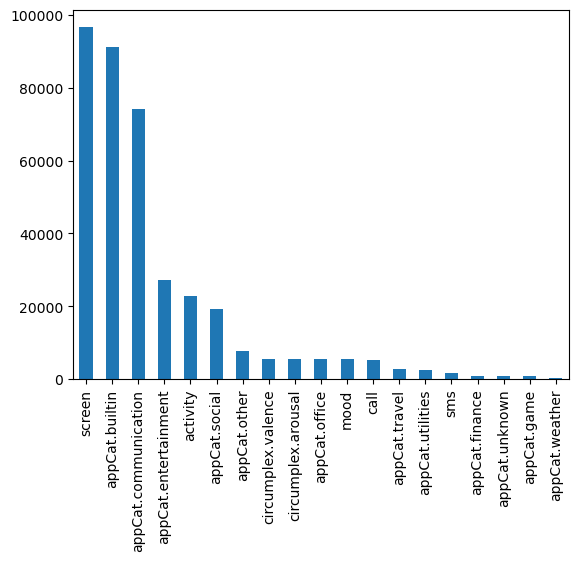

In [10]:
samples['variable'].value_counts().plot(kind="bar")